In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

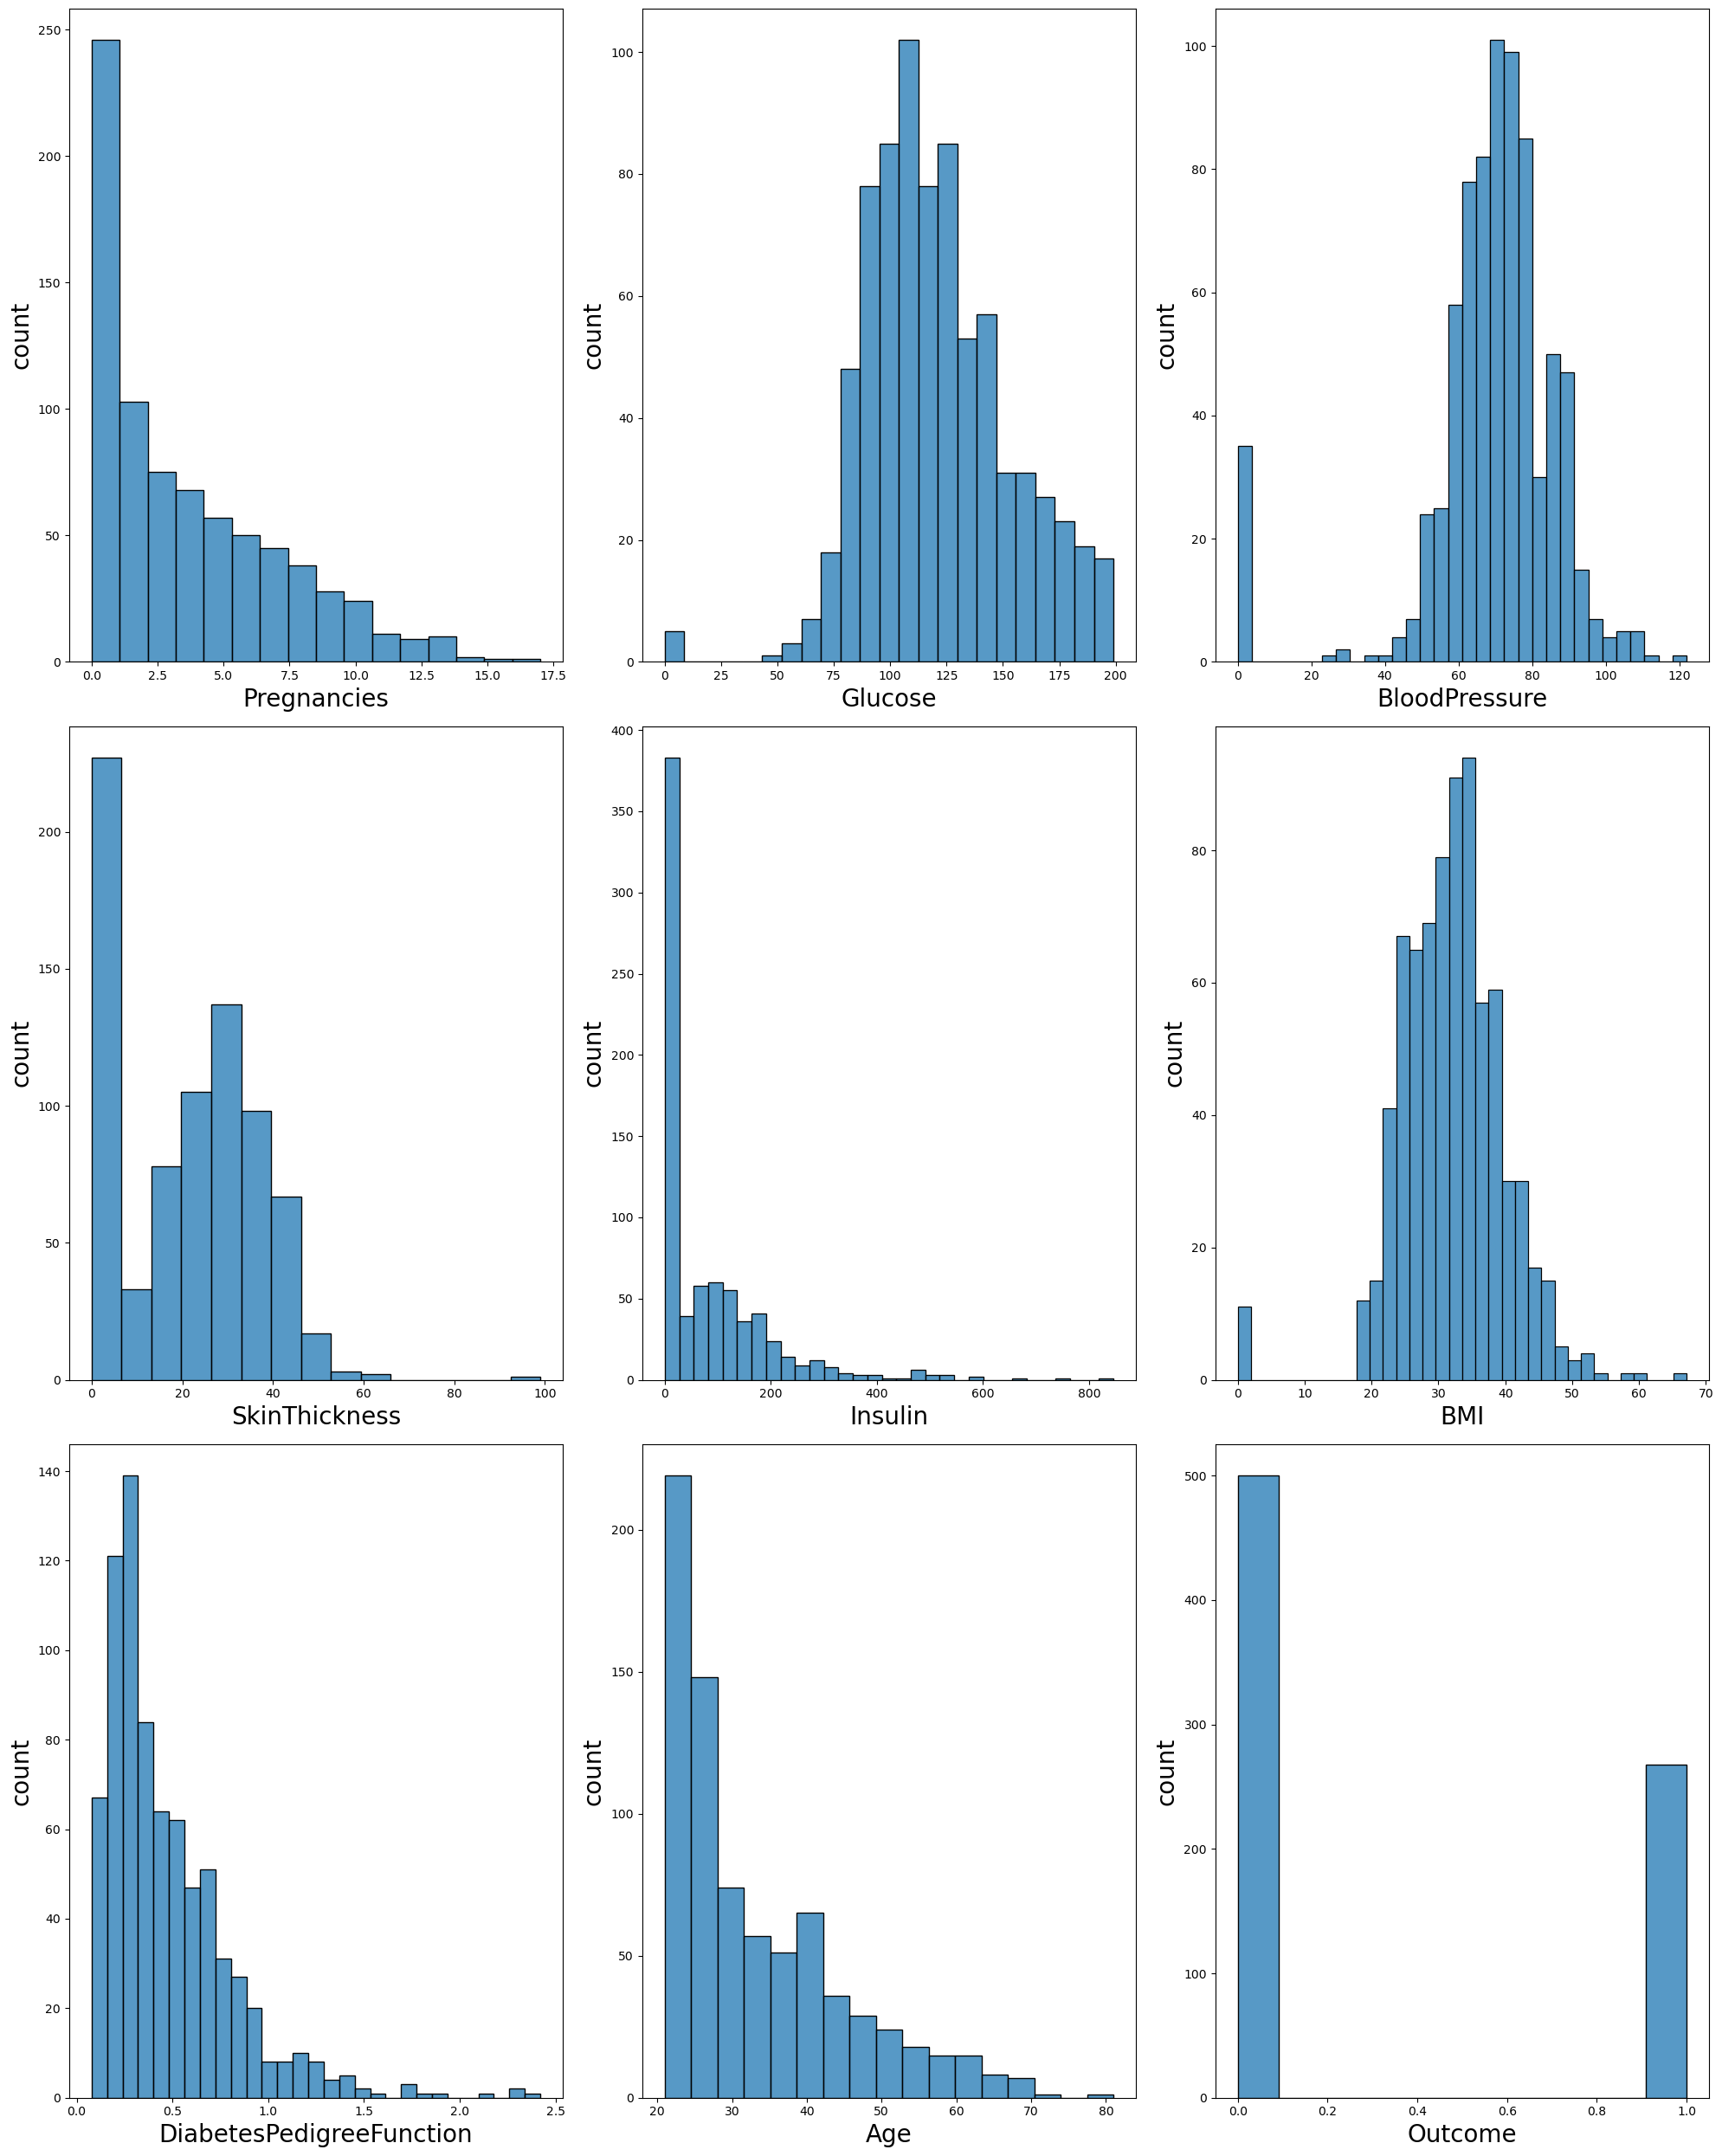

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plot_number=1
for column in data:
    if plot_number<=9:
        plt.subplot(3,3,plot_number)
        ax=sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot_number+=1
plt.tight_layout()
plt.show()   

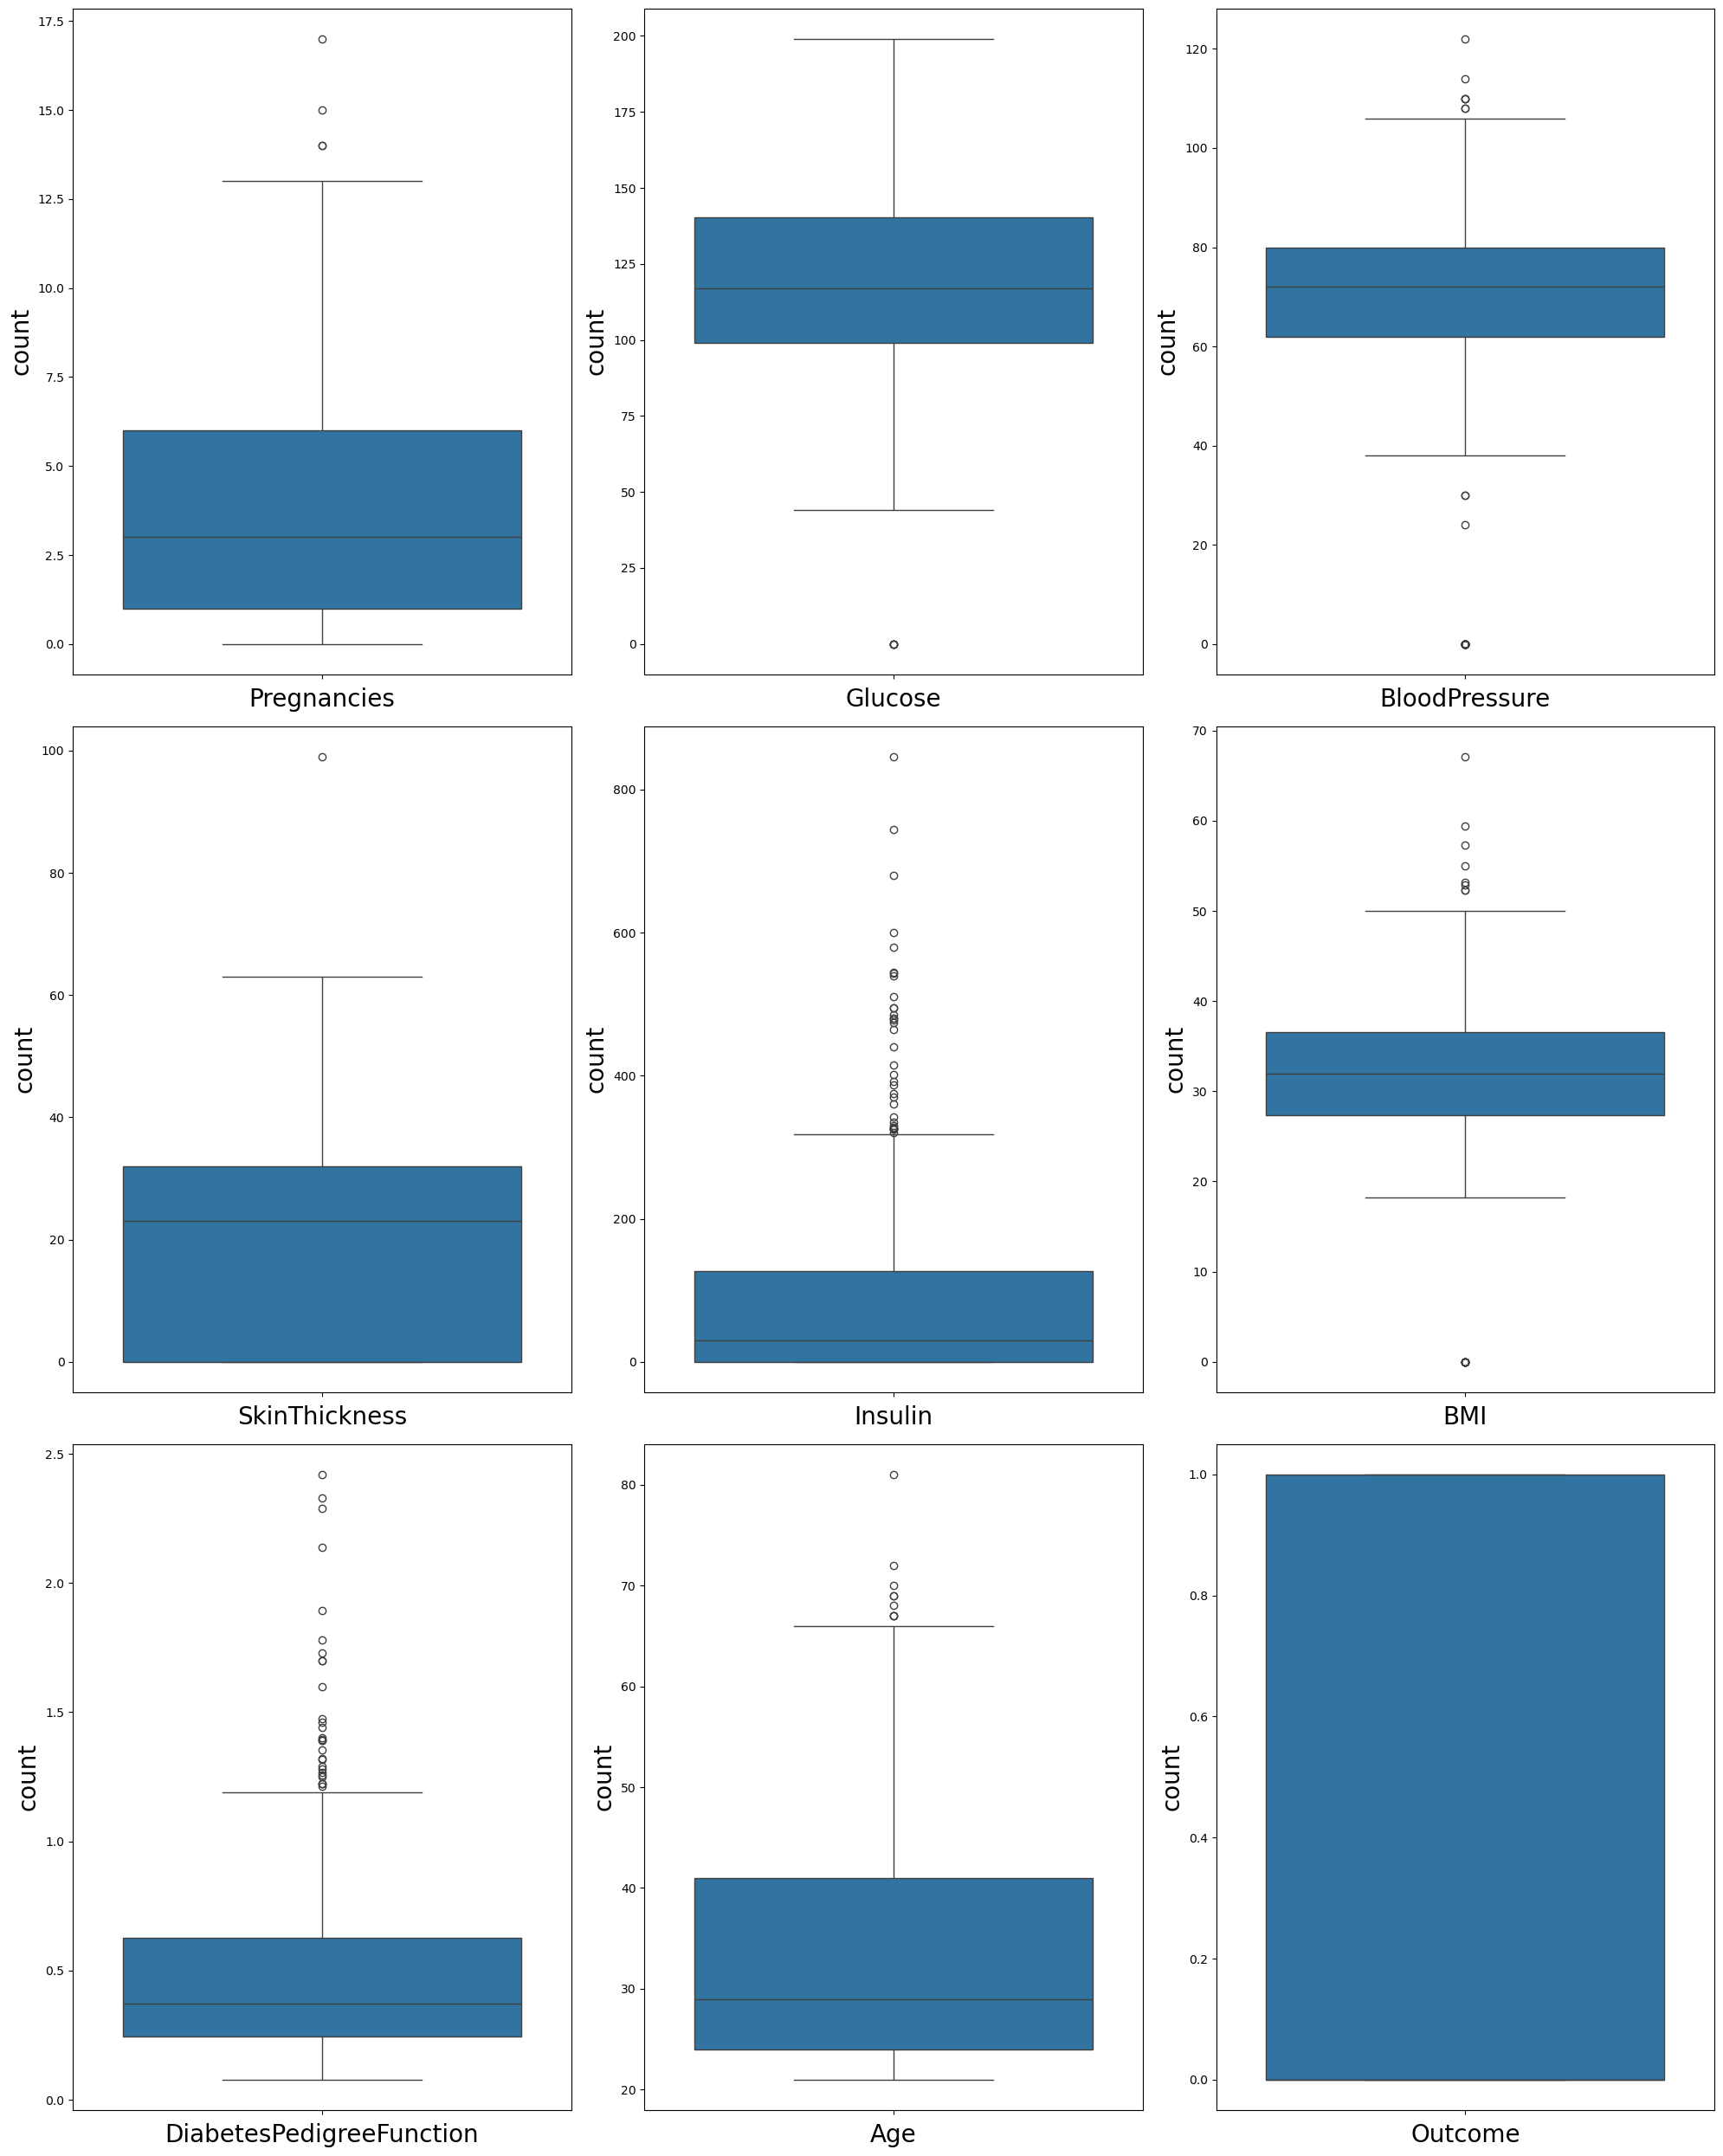

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plot_number=1
for column in data:
    if plot_number<=9:
        plt.subplot(3,3,plot_number)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot_number+=1
plt.tight_layout()
plt.show()
    

In [19]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

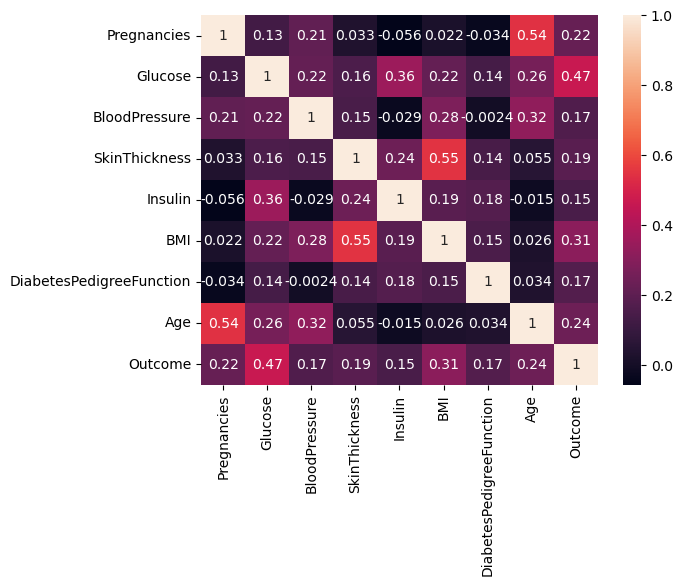

In [21]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [25]:
X=data.iloc[:,:-1]
y=data.Outcome

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [27]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=clf.predict(X_test)

In [29]:
y_pred_proba=clf.predict_proba(X_test)

In [30]:
y_pred_proba

array([[0.37974872, 0.62025128],
       [0.86226774, 0.13773226],
       [0.66152176, 0.33847824],
       [0.52705228, 0.47294772],
       [0.86703145, 0.13296855],
       [0.81396613, 0.18603387],
       [0.52704745, 0.47295255],
       [0.95844701, 0.04155299],
       [0.23378006, 0.76621994],
       [0.89853832, 0.10146168],
       [0.12059418, 0.87940582],
       [0.5226932 , 0.4773068 ],
       [0.92011497, 0.07988503],
       [0.41488103, 0.58511897],
       [0.73859971, 0.26140029],
       [0.91578428, 0.08421572],
       [0.01799985, 0.98200015],
       [0.44863661, 0.55136339],
       [0.24639821, 0.75360179],
       [0.9725373 , 0.0274627 ],
       [0.39890681, 0.60109319],
       [0.64178676, 0.35821324],
       [0.46276667, 0.53723333],
       [0.79528934, 0.20471066],
       [0.99669815, 0.00330185],
       [0.31189185, 0.68810815],
       [0.87436473, 0.12563527],
       [0.24940419, 0.75059581],
       [0.06225118, 0.93774882],
       [0.88854812, 0.11145188],
       [0.

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score

In [33]:
classification=classification_report(y_pred,y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       139
           1       0.52      0.60      0.56        53

    accuracy                           0.73       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.75      0.73      0.74       192



In [34]:
f1score=f1_score(y_test,y_pred)
f1score

0.5565217391304348

In [35]:
recall=recall_score(y_test,y_pred)
recall


0.5161290322580645